## Fuzzy-logic Tipping Control

1) Bangun struktur membership function manual untuk 'performance' dan 'years_of_service'
2) Definisikan kelas untuk masing-masing parameter!
3) buatlah 'rules' baru!

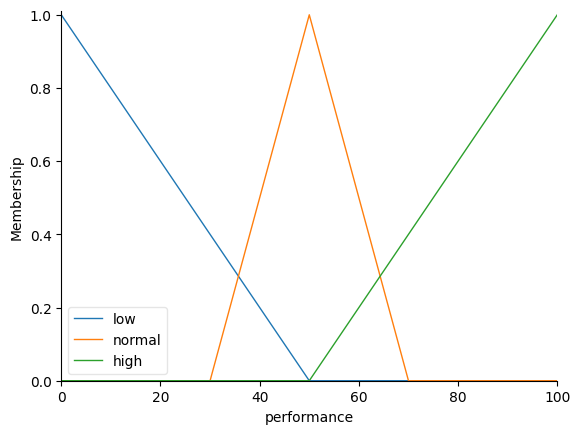

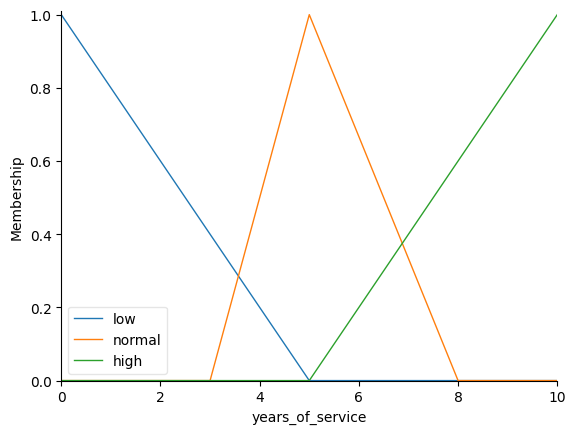

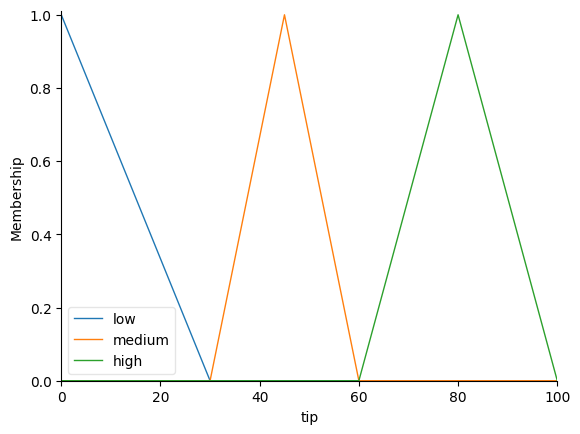

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Merubah nama variabel menjadi performance, years_of_service
# Merubah nilai pada Antecedent pada masing - masing kategori

performance = ctrl.Antecedent(np.arange(0, 101, 1), 'performance')
years_of_service = ctrl.Antecedent(np.arange(0, 11, 1), 'years_of_service')
tip = ctrl.Consequent(np.arange(0, 101, 1), 'tip')

# Kinerja
performance['low'] = fuzz.trimf(performance.universe, [0, 0, 50])
performance['normal'] = fuzz.trimf(performance.universe, [30, 50, 70])
performance['high'] = fuzz.trimf(performance.universe, [50, 100, 100])

# Masa Kerja
years_of_service['low'] = fuzz.trimf(years_of_service.universe, [0, 0, 5])
years_of_service['normal'] = fuzz.trimf(years_of_service.universe, [3, 5, 8])
years_of_service['high'] = fuzz.trimf(years_of_service.universe, [5, 10, 10])

# Bonus
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 30])
tip['medium'] = fuzz.trimf(tip.universe, [30, 45, 60])
tip['high'] = fuzz.trimf(tip.universe, [60, 80, 100])

performance.view()
years_of_service.view()
tip.view()
plt.show()

In [ ]:
# Membuat Rules yang baru
Rules = [
    ctrl.Rule(performance['low'] & years_of_service['low'], tip['low']),
    ctrl.Rule(performance['low'] & years_of_service['normal'], tip['low']),
    ctrl.Rule(performance['low'] & years_of_service['high'], tip['medium']),
    ctrl.Rule(performance['normal'] & years_of_service['low'], tip['low']),
    ctrl.Rule(performance['normal'] & years_of_service['normal'], tip['medium']),
    ctrl.Rule(performance['normal'] & years_of_service['high'], tip['high']),
    ctrl.Rule(performance['high'] & years_of_service['low'], tip['medium']),
    ctrl.Rule(performance['high'] & years_of_service['normal'], tip['high']),
    ctrl.Rule(performance['high'] & years_of_service['high'], tip['high'])
]


In [109]:
tipping_ctrl = ctrl.ControlSystem(Rules)

In [110]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Hitung Bonus: 80.00


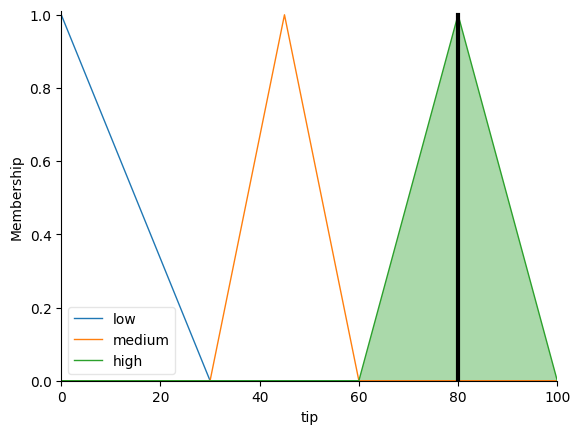

In [ ]:
# Menginputkan nilain untuk menentukan bonus
tipping.input['performance'] = 100
tipping.input['years_of_service'] = 10

tipping.compute() # Melakukan Defuzifikasi

#  Mengubah Sintax Pada output nya
print(f"Hitung Bonus: {tipping.output['tip']:.2f}")
tip.view(sim=tipping)


In [ ]:
# Menambahkan sintax untuk mengetahui nilai keanggotan dari Kinerja dan Masa Kerja

# Nilai keanggotaan untuk performance = 70
perf_low = fuzz.interp_membership(performance.universe, performance['low'].mf, 70)
perf_normal = fuzz.interp_membership(performance.universe, performance['normal'].mf, 70)
perf_high = fuzz.interp_membership(performance.universe, performance['high'].mf, 70)

# Nilai keanggotaan untuk years_of_service = 6
service_low = fuzz.interp_membership(years_of_service.universe, years_of_service['low'].mf, 6)
service_normal = fuzz.interp_membership(years_of_service.universe, years_of_service['normal'].mf, 6)
service_high = fuzz.interp_membership(years_of_service.universe, years_of_service['high'].mf, 6)

# Print nilai keanggotaan
print("Nilai keanggotaan performance:")
print(f"Low: {perf_low:.2f}, normal: {perf_normal:.2f}, High: {perf_high:.2f}")

print("\nNilai keanggotaan masa kerja:")
print(f"Low: {service_low:.2f}, normal: {service_normal:.2f}, High: {service_high:.2f}")


Nilai keanggotaan performance:
Low: 0.00, normal: 0.00, High: 0.40

Nilai keanggotaan masa kerja:
Low: 0.00, normal: 0.67, High: 0.20
